# Figure 5: Decoding of natural movie features from mouse visual cortical areas

#### import plot and data loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl

In [2]:
data=pd.read_hdf('../data/Figure5Revision.h5')

In [3]:
frame_np_bayes_baseline_330 = data['frame_id']['bayes']['np_baseline_330']
frame_np_bayes_baseline_33 = data['frame_id']['bayes']['np_baseline_33']
frame_np_knn_baseline_330 =data['frame_id']['knn']['np_baseline_330']
frame_np_knn_baseline_33 = data['frame_id']['knn']['np_baseline_33']
frame_np_cebra_knn_330 = data['frame_id']['knn']['np_cebra_330']
frame_np_cebra_knn_33 = data['frame_id']['knn']['np_cebra_33']
frame_np_joint_cebra_knn_330 = data['frame_id']['knn']['np_cebra_joint_330']
frame_np_joint_cebra_knn_33 = data['frame_id']['knn']['np_cebra_joint_33']


scene_np_bayes_baseline_330 = data['scene_annotation']['bayes']['np_baseline_330']
scene_np_bayes_baseline_33 = data['scene_annotation']['bayes']['np_baseline_33']
scene_np_knn_baseline_330 =data['scene_annotation']['knn']['np_baseline_330']
scene_np_knn_baseline_33 = data['scene_annotation']['knn']['np_baseline_33']
scene_np_cebra_knn_330 = data['scene_annotation']['knn']['np_cebra_330']
scene_np_cebra_knn_33 = data['scene_annotation']['knn']['np_cebra_33']
scene_np_joint_cebra_knn_330 = data['scene_annotation']['knn']['np_cebra_joint_330']
scene_np_joint_cebra_knn_33 = data['scene_annotation']['knn']['np_cebra_joint_33']

frame_np_bayes_baseline_330_err = data['frame_err']['bayes']['np_baseline_330']
frame_np_knn_baseline_330_err =data['frame_err']['knn']['np_baseline_330']
frame_np_cebra_knn_330_err = data['frame_err']['knn']['np_cebra_330']
frame_np_joint_cebra_knn_330_err = data['frame_err']['knn']['np_cebra_joint_330']

frame_np_bayes_baseline_33_err = data['frame_err']['bayes']['np_baseline_33']
frame_np_knn_baseline_33_err =data['frame_err']['knn']['np_baseline_33']
frame_np_cebra_knn_33_err = data['frame_err']['knn']['np_cebra_33']
frame_np_joint_cebra_knn_33_err = data['frame_err']['knn']['np_cebra_joint_33']

### Define plotting functions & metrics

In [12]:
num_neurons = [50,100,200,400, 600, 800,900, 1000]

def set_ax(ax, white_c):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color(white_c)
    ax.spines['bottom'].set_color(white_c)
    ax.set_xticks([200,400, 600, 800,1000], [200,400, 600, 800,1000], fontsize = 30, color = white_c)
    ax.set_yticks(np.linspace(0,100,5), np.linspace(0,100,5, dtype = int), fontsize = 30,color = white_c)
    ax.set_xlabel('# Neurons', fontsize = 35, color = white_c)
    ax.set_ylabel('Acc (%, in 1s time window)', fontsize=35, color = white_c)
    ax.tick_params(colors=white_c)
    l1=ax.legend(fontsize= 15, loc = 'best', title_fontsize = 15,  frameon = False  )
    
    for text in l1.get_texts():
        text.set_color(white_c)
        
def n_mean_err(dic, ns = num_neurons):
    means=[]
    errs=[]
    for n in ns:
        means.append(np.mean(dic[n]))
        errs.append(np.std(dic[n])/np.sqrt(len(dic[n])))
    return np.array(means), np.array(errs)

def n_mean_err_joint(dic, modality, ns = num_neurons):
    means=[]
    errs=[]
    if modality == 'np':
        ind = 1
    elif modality == 'ca':
        ind = 0
    for n in ns:
        _d = np.array(dic[n])[:,ind]
        means.append(np.mean(_d))
        errs.append(np.std(_d)/np.sqrt(len(_d)))
    return np.array(means), np.array(errs)

def n_mean_err_frame_diff(err_dict, ns = num_neurons):
    means = []
    errs = []
    for n in ns:
        err_seeds = err_dict[n]
        accs=[np.mean(abs(seed_result)) for seed_result in err_seeds]
        means.append(np.mean(accs))
        errs.append(np.std(accs)/np.sqrt(len(accs)))
    return means, errs


def n_mean_err_frame_diff_joint(err_dict,data_type = 'np', ns = num_neurons):
    if data_type == 'np':
        index = 1
    else:
        index = 0
    means = []
    errs = []
    for n in ns:
        err_seeds = err_dict[n]
        accs=[np.mean(abs(seed_result[index])) for seed_result in err_seeds]
        means.append(np.mean(accs))
        errs.append(np.std(accs)/np.sqrt(len(accs)))
    return means, errs

## Fgure 5 c

- Decoding accuracy measured by considering a predicted frame being within 1 sec to the true frame as a correct prediction using CEBRA (NP only), jointly trained (2P+NP), or a baseline population-vector plus kNN or Bayes decoder using either a 1 frame (33 ms) receptive field or 10 frames (330 ms); results shown for Neuropixels dataset (V1 data).

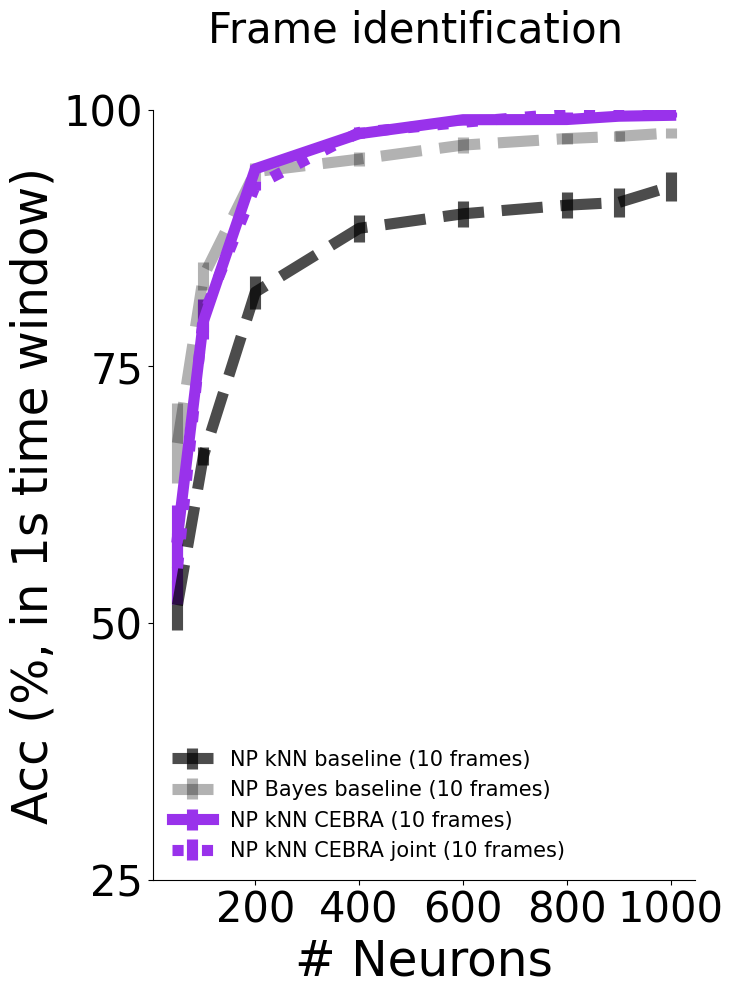

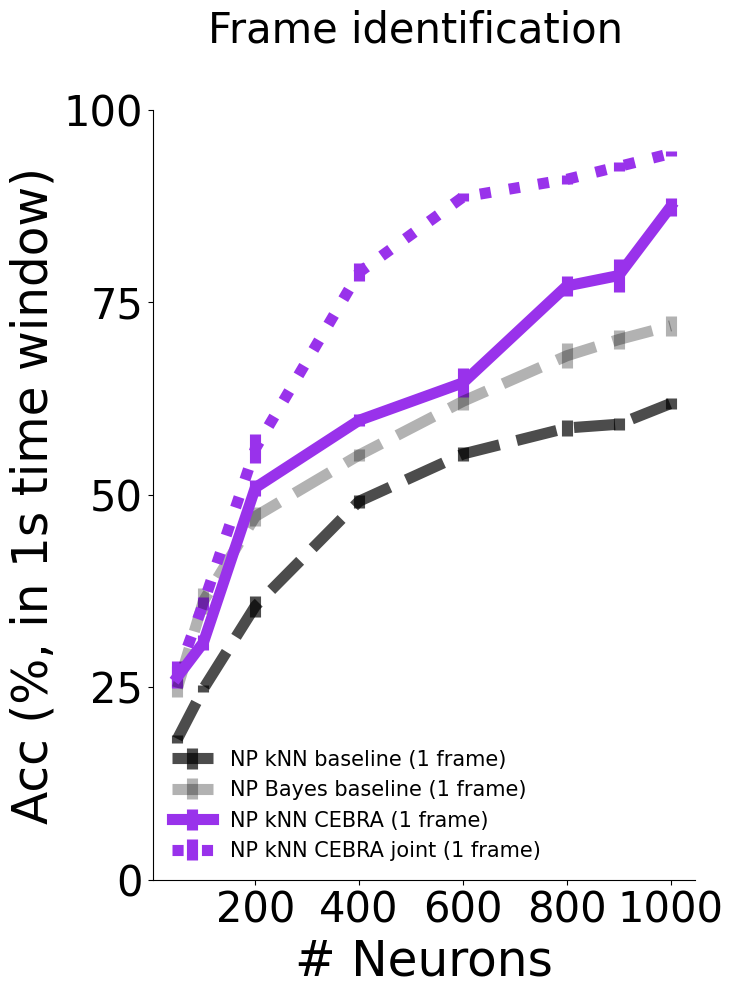

In [17]:
white = False

if white:
    white_c='white'
else:
    white_c = 'black'


fig_330 = plt.figure(figsize=(7,10))
fig_330.suptitle('Frame identification', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(111)

c="#9932EB"

ax1.errorbar(num_neurons, n_mean_err(frame_np_knn_baseline_330)[0], n_mean_err(frame_np_knn_baseline_330)[1],
             ls = '--',label = 'NP kNN baseline (10 frames)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err(frame_np_bayes_baseline_330)[0], n_mean_err(frame_np_bayes_baseline_330)[1],
             ls='--',  label = 'NP Bayes baseline (10 frames)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err(frame_np_cebra_knn_330)[0], n_mean_err(frame_np_cebra_knn_330)[1], 
             label = 'NP kNN CEBRA (10 frames)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)
             
ax1.errorbar(num_neurons, n_mean_err_joint(frame_np_joint_cebra_knn_330, 'np')[0], 
             n_mean_err_joint(frame_np_joint_cebra_knn_330, 'np')[1], 
            ls = 'dotted',label = 'NP kNN CEBRA joint (10 frames)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)


set_ax(ax1, white_c)
ax1.set_ylim(25,100)
fig_33 = plt.figure(figsize=(7,10))
fig_33.suptitle('Frame identification', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(111)

c="#9932EB"

ax1.errorbar(num_neurons, n_mean_err(frame_np_knn_baseline_33)[0], n_mean_err(frame_np_knn_baseline_33)[1], 
             ls = '--', label = 'NP kNN baseline (1 frame)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err(frame_np_bayes_baseline_33)[0], n_mean_err(frame_np_bayes_baseline_33)[1], 
             ls = '--',label = 'NP Bayes baseline (1 frame)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)


ax1.errorbar(num_neurons, n_mean_err(frame_np_cebra_knn_33)[0], n_mean_err(frame_np_cebra_knn_33)[1], 
             label = 'NP kNN CEBRA (1 frame)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)
         
ax1.errorbar(num_neurons, n_mean_err_joint(frame_np_joint_cebra_knn_33, 'np')[0], 
             n_mean_err_joint(frame_np_joint_cebra_knn_33, 'np')[1], 
            ls = 'dotted',label = 'NP kNN CEBRA joint (1 frame)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

set_ax(ax1, white_c)


plt.show()

## Figure 5 d

- Decoding accuracy measured by the correct scene prediction using either CEBRA (NP only), jointly trained (2P+NP), or baseline population-vector plus kNN or Bayes decoder using a 1 frame (33 ms) receptive field (V1 data).

Text(0, 0.5, 'Acc (%)')

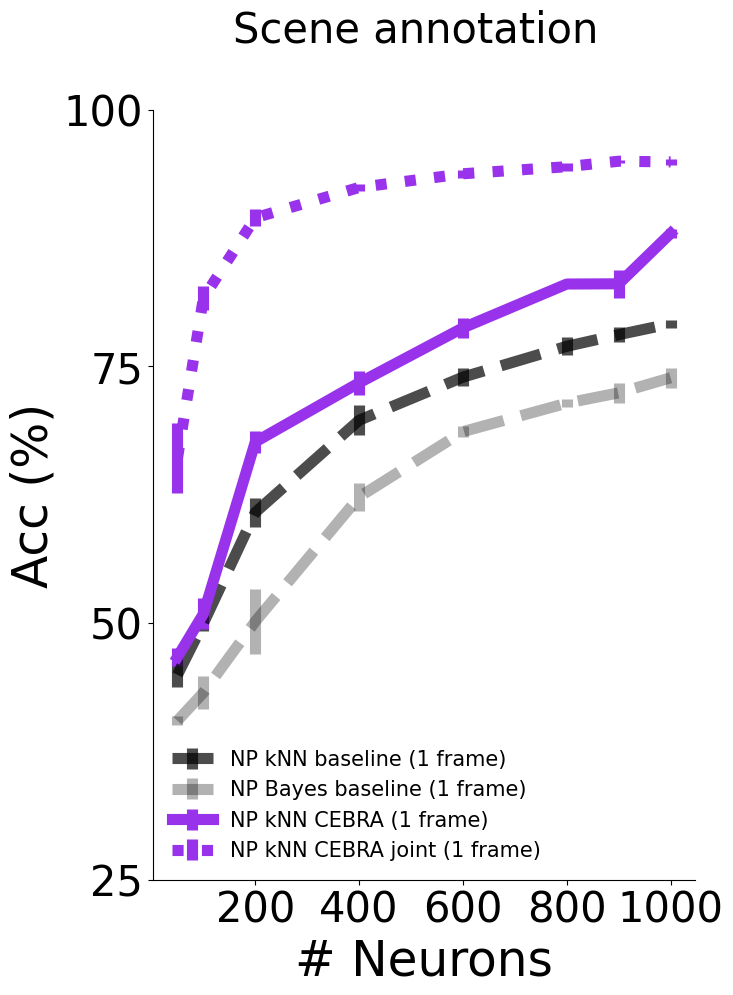

In [23]:

white = False

if white:
    white_c='white'
else:
    white_c = 'black'

fig_33 = plt.figure(figsize=(7,10))
fig_33.suptitle('Scene annotation', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(111)
ax1.errorbar(num_neurons, n_mean_err(scene_np_knn_baseline_33)[0]*100, n_mean_err(scene_np_knn_baseline_33)[1]*100, 
             ls = '--', label = 'NP kNN baseline (1 frame)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)
ax1.errorbar(num_neurons, n_mean_err(scene_np_bayes_baseline_33)[0]*100, n_mean_err(scene_np_bayes_baseline_33)[1]*100, 
             ls = '--',label = 'NP Bayes baseline (1 frame)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err(scene_np_cebra_knn_33)[0]*100, n_mean_err(scene_np_cebra_knn_33)[1]*100, 
             label = 'NP kNN CEBRA (1 frame)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err_joint(scene_np_joint_cebra_knn_33, 'np')[0]*100, 
             n_mean_err_joint(scene_np_joint_cebra_knn_33, 'np')[1]*100, 
            ls = 'dotted',label = 'NP kNN CEBRA joint (1 frame)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

set_ax(ax1, white_c)
ax1.set_ylim(25,100)
ax1.set_ylabel(f'Acc (%)', fontsize= 35,  color = white_c)

## Figure 5e

- Single frame ground truth frame ID vs predicted frame ID for Neuropixels using a \cebra-Behavior model trained with a 330 ms receptive field (1K V1 neurons across mice used).

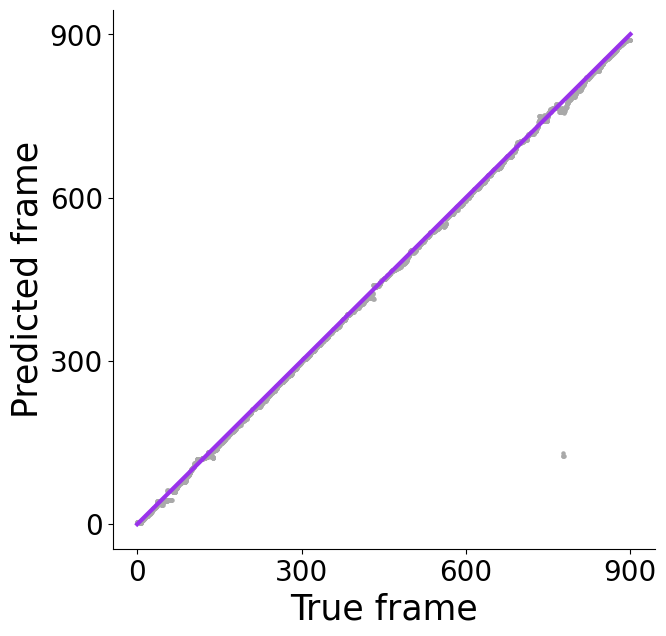

In [41]:
fig= plt.figure(figsize=(7,7))
ax=plt.subplot(111)
frame_err = frame_np_cebra_knn_330_err[1000][3]
ax.scatter(np.arange(len(frame_err)), np.repeat(np.arange(900),4)+frame_err, s=5, c = 'darkgray' )
ax.plot((0,len(frame_err)), (0,900), c="#9932EB", lw=3,)
ax.set_xticks(np.linspace(0,3600, 4), np.linspace(0,900,4).astype(int), fontsize=20)
ax.set_yticks(np.linspace(0,900, 4), np.linspace(0,900,4).astype(int), fontsize=20)
ax.set_xlabel('True frame', fontsize=25)
ax.set_ylabel('Predicted frame', fontsize=25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Figure 5 f

- The mean absolute error of the correct frame index. Shown for baseline and CEBRA models as computed in c, d, e.

Text(0, 0.5, 'Frame difference')

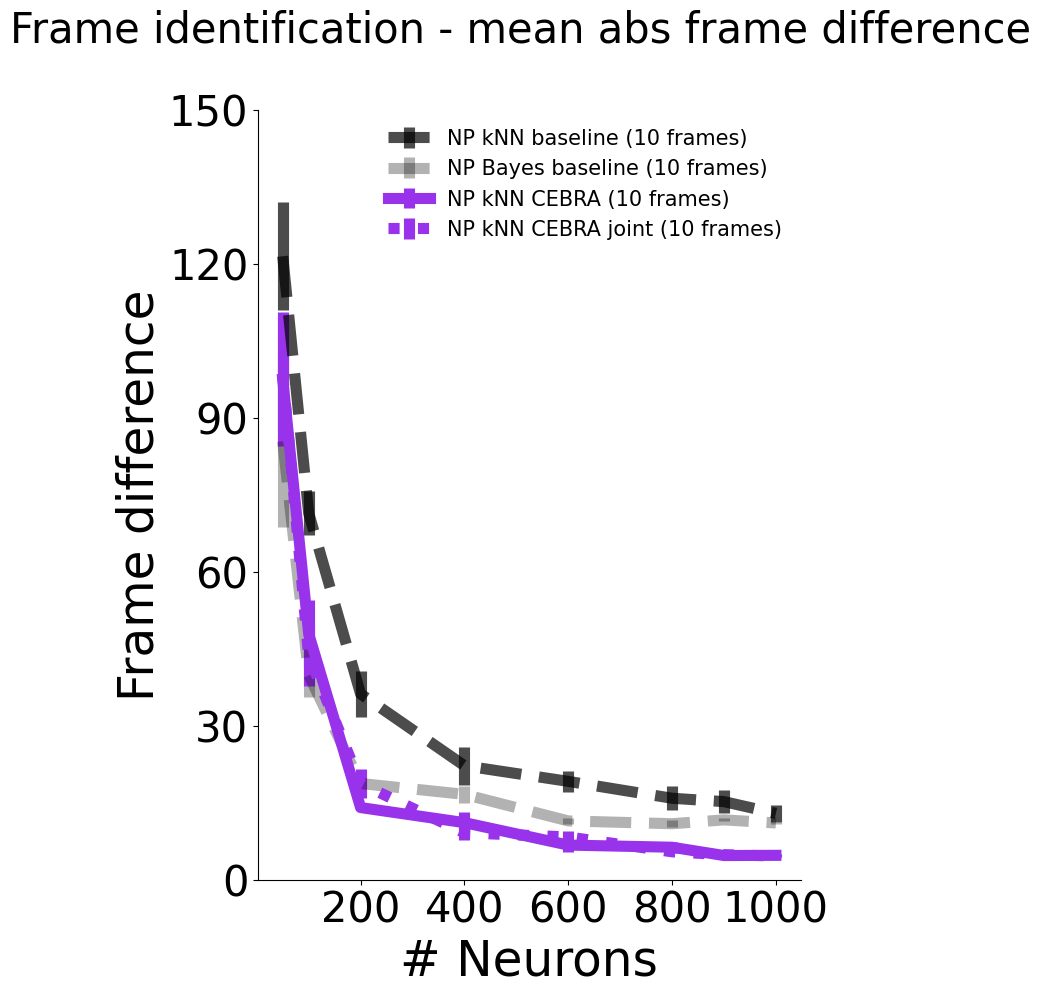

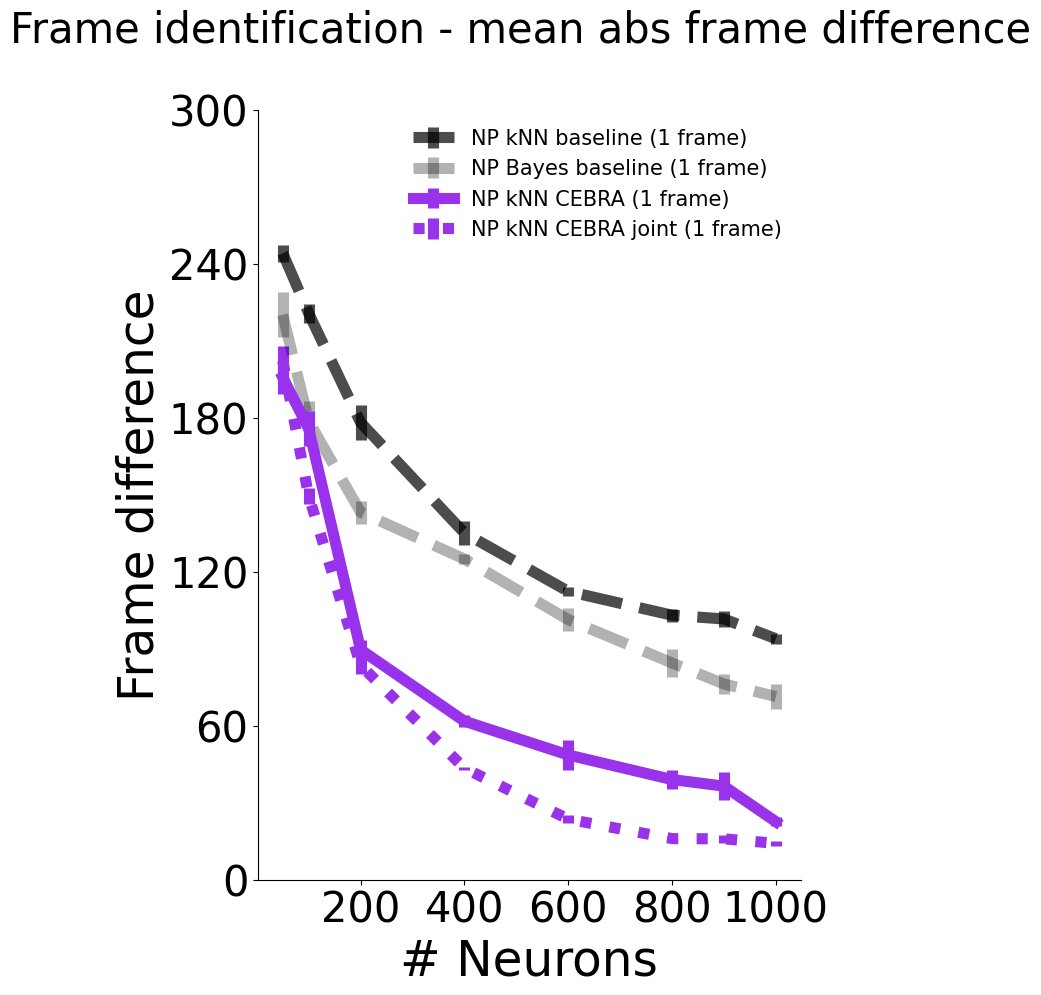

In [28]:
white = False

if white:
    white_c='white'
else:
    white_c = 'black'

fig_330 = plt.figure(figsize=(7,10))
fig_330.suptitle(f'Frame identification - mean abs frame difference', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(111)
c="#9932EB"

ax1.errorbar(num_neurons, n_mean_err_frame_diff(frame_np_knn_baseline_330_err)[0], 
             n_mean_err_frame_diff(frame_np_knn_baseline_330_err)[1],
             ls = '--',label = 'NP kNN baseline (10 frames)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err_frame_diff(frame_np_bayes_baseline_330_err)[0],
             n_mean_err_frame_diff(frame_np_bayes_baseline_330_err)[1],
             ls='--',  label = 'NP Bayes baseline (10 frames)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err_frame_diff(frame_np_cebra_knn_330_err)[0], 
             n_mean_err_frame_diff(frame_np_cebra_knn_330_err)[1], 
             label = 'NP kNN CEBRA (10 frames)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)
             
ax1.errorbar(num_neurons, n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_330_err,'np')[0], 
             n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_330_err,'np')[1], 
            ls = 'dotted',label = 'NP kNN CEBRA joint (10 frames)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax1.set_ylim(0, 150)
set_ax(ax1, white_c)
ax1.set_yticks(np.linspace(0,150,6), np.linspace(0,150,6, dtype = int), fontsize = 30,color = white_c)
ax1.set_ylabel('Frame difference', fontsize=35)

white = False

if white:
    white_c='white'
else:
    white_c = 'black'

fig_33 = plt.figure(figsize=(7,10))
fig_33.suptitle(f'Frame identification - mean abs frame difference', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(111)

c="#9932EB"

ax1.errorbar(num_neurons, n_mean_err_frame_diff(frame_np_knn_baseline_33_err)[0], 
             n_mean_err_frame_diff(frame_np_knn_baseline_33_err)[1],
             ls = '--',label = 'NP kNN baseline (1 frame)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err_frame_diff(frame_np_bayes_baseline_33_err)[0],
             n_mean_err_frame_diff(frame_np_bayes_baseline_33_err)[1],
             ls='--',  label = 'NP Bayes baseline (1 frame)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax1.errorbar(num_neurons, n_mean_err_frame_diff(frame_np_cebra_knn_33_err)[0], 
             n_mean_err_frame_diff(frame_np_cebra_knn_33_err)[1], 
             label = 'NP kNN CEBRA (1 frame)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)
             
ax1.errorbar(num_neurons, n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_33_err,'np')[0], 
             n_mean_err_frame_diff_joint(frame_np_joint_cebra_knn_33_err,'np')[1], 
            ls = 'dotted',label = 'NP kNN CEBRA joint (1 frame)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax1.set_ylim(0, 300)
set_ax(ax1, white_c)
ax1.set_yticks(np.linspace(0,300,6), np.linspace(0,300,6, dtype = int), fontsize = 30,color = white_c)
ax1.set_ylabel('Frame difference', fontsize=35)

## Figure 5 g 

- Diagram of the cortical areas considered, and decoding performance from CEBRA jointly trained (2P+NP), 10 frame receptive field.

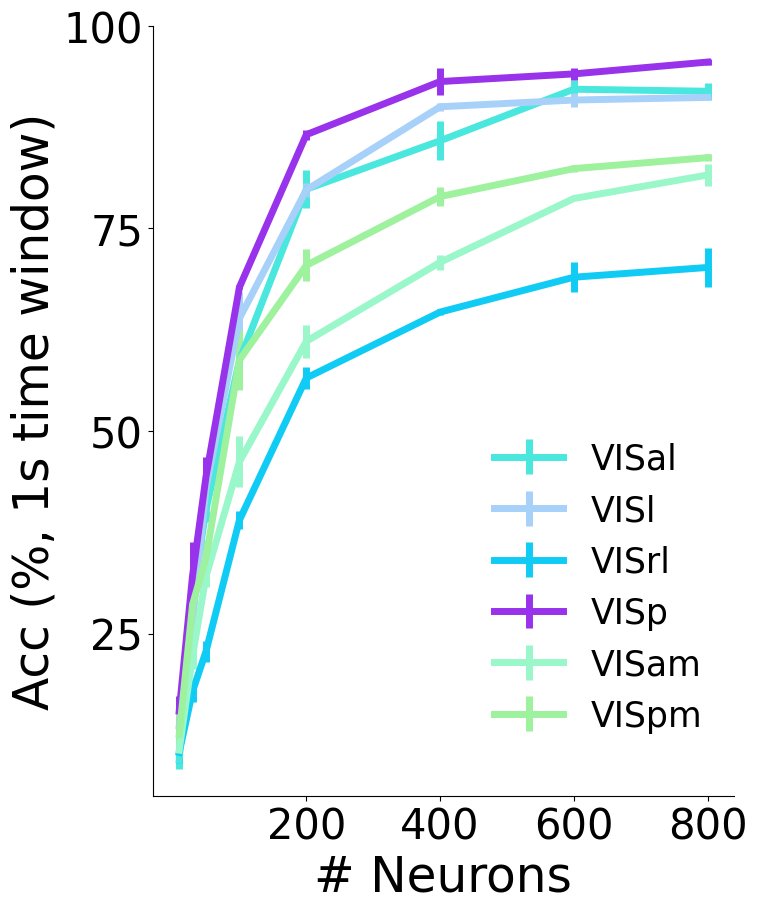

In [33]:
colors = {
    'VISl':'#A7D1F9',
    'VISrl': '#10CCF5',
    'VISal': '#49E7DD',
    'VISp': "#9932EB",
    'VISam':"#99F7CA",
    'VISpm':"#9EF19D"
    
}

np_decoding = data['cortex_decoding']

fig=plt.figure(figsize=(7.5,10))
#plt.title('Decoding by cortical area - DINO feature', fontsize=35, y=1.1)
ax = plt.subplot(111)
for area in ['VISal', 'VISl', 'VISrl', 'VISp', 'VISam', 'VISpm']:
    ax.errorbar([10,30, 50, 100, 200, 400, 600, 800], [np.mean(np_decoding[area][k])
                                for k in [10,30, 50, 100, 200, 400, 600, 800]], 
                [np.std(np_decoding[area][k])/np.sqrt(len(np_decoding[area][k]))
                                for k in [10,30, 50, 100, 200, 400, 600, 800]],
                label = area, 
                lw = 5, color = colors[area])
    
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xticks([10,30, 50, 100, 200, 400, 600, 800][4:], [10,30, 50, 100, 200, 400, 600, 800][4:], fontsize = 30, color = 'k')

plt.yticks( np.linspace(0, 100, 5),np.linspace(0, 100, 5,dtype = int), color = 'k', fontsize=30)

plt.xlabel('# Neurons', fontsize=35)
plt.ylabel('Acc (%, 1s time window)', fontsize=35)
plt.ylim(5,100)
l=plt.legend(frameon = False, bbox_to_anchor=[1,0.5], fontsize=25 )

## Figure 5 h

- V1 decoding performance vs. layer category using 900 neurons with a 330 ms receptive field \cebra-Behavior model.

(75.0, 100.0)

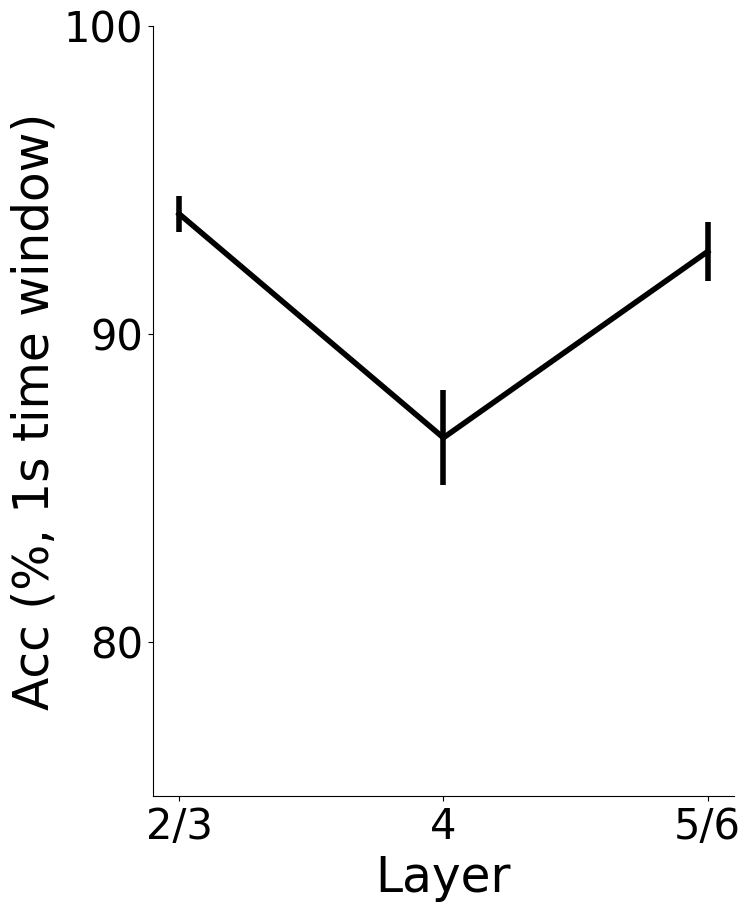

In [10]:
layer_decoding = data['layer_decoding'][900]
fig=plt.figure(figsize=(7.5,10))
ax=fig.add_subplot(111)

labels =['900']
colors =['black', 'gray', 'lightgray']

ax.errorbar(np.arange(3), [np.mean(layer_decoding[layer])for layer in [2,4,5]], 
            [np.std(layer_decoding[layer]) / np.sqrt(len(layer_decoding[layer]))for layer in [2,4,5]],
           c='k', lw = 4)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['2/3', '4', '5/6'], fontsize=30)
ax.set_yticks(np.linspace(70, 100, 4))
ax.set_yticklabels(np.linspace(70, 100, 4, dtype= int), fontsize=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontsize=30)
plt.ylabel('Acc (%, 1s time window)', fontsize= 35)
plt.xlabel('Layer', fontsize= 35)
plt.ylim(75, 100)
#plt.legend(frameon=False, fontsize='xx-large')